Expected Value vs. CVaR Comparison

Mauricio Tombini and Victor M. Zavala 2016 

University of Wisconsin-Madison 

In [1]:
# Loading packages:

using JuMP 
using Distributions 
using Ipopt
using Gadfly
set_default_plot_size(20cm, 15cm)
#using PyPlot 

In [3]:
# Generate random data: 

NS = 100
S = collect(1:NS); 
srand(0)
μ = 0; σ = 2; 
d = Normal(μ,σ)
R = rand(d,NS);

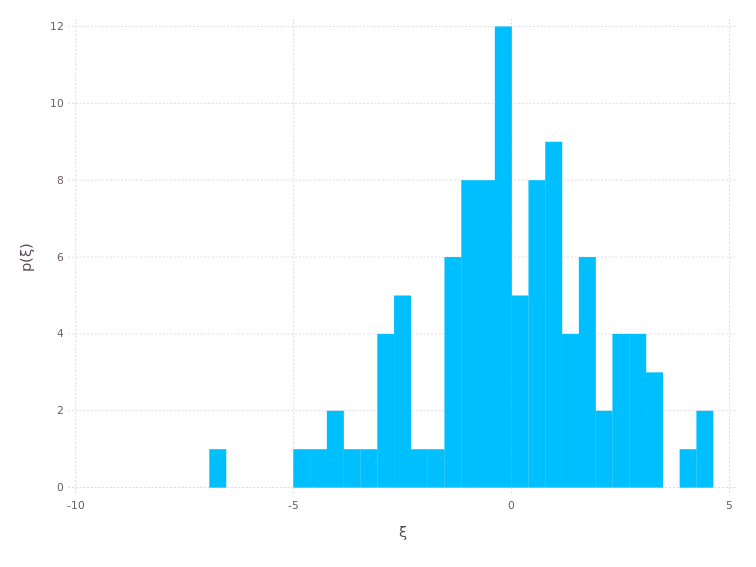

In [4]:
# Plotting data
p = plot(x = R, Geom.histogram(bincount = 30),Guide.XLabel("ξ"), Guide.YLabel("p(ξ)"))

# plt[:hist](R, bins = 30);
# grid("on")
# xlabel(L"\xi")
# ylabel(L"p(\xi)")

Solve expected value problem

In [5]:
# ex1gauss.mod 
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, x)              # decision variable
@variable(m, cost[1:NS])   # per scenario cost
@constraint(m, costeq[s in S], cost[s] == (x-R[s])^2) 

@objective(m, Min, (1/NS)*sum{cost[s], s in S})

solve(m)
solcost = getvalue(cost);
println("x=",getvalue(x))
println("mean=",getobjectivevalue(m))
println("meanR=",(1/NS)*sum(R))


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

x=-0.04964096309993643
mean=4.41838656225072
meanR=-0.04964096309993612


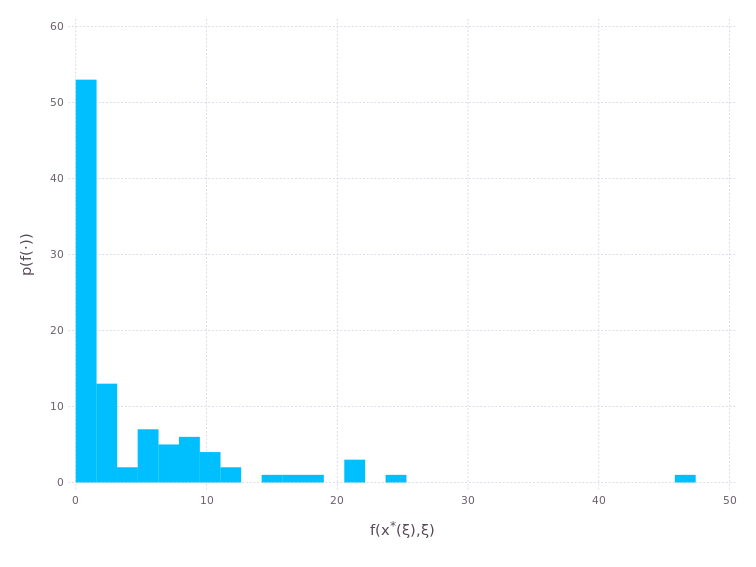

In [6]:
# Plotting cost fistribution 
plot(x = solcost, Geom.histogram(bincount = 30),Guide.XLabel("f(x<sup>*</sup>(ξ),ξ)"), Guide.YLabel("p(f(⋅))"))

# plt[:hist](solcost,bins = 30)
# grid("on")
# xlabel(L"f(x^*(\xi),\xi)")
# ylabel(L"p(f(\cdot))")

Solve CVaR Problem

In [7]:
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, x)              # decision variable
@variable(m, cost[1:NS])     # per scenario cost
@variable(m, VaR)            # cvar auxiliary variable
@variable(m, phi[S] >= 0)    # cvar auxiliary variable

# set cvar parameter"
alpha = 0.0001;               # probability level cvar

@constraint(m, costeq[s in S], cost[s] == (x-R[s])^2) 
@constraint(m, cvar[s in S], cost[s]-VaR <= phi[s])

@objective(m, Min, VaR + (1/NS)*sum{(1/alpha)*phi[s], s in S})

solve(m)
solcost2 = getvalue(cost);
println("x=",getvalue(x))
println("CVaR=",getobjectivevalue(m))
println("mean=",(1/NS)*sum(solcost2))

x=-1.1535740095771057
CVaR=33.42170024257977
mean=5.637054734120721


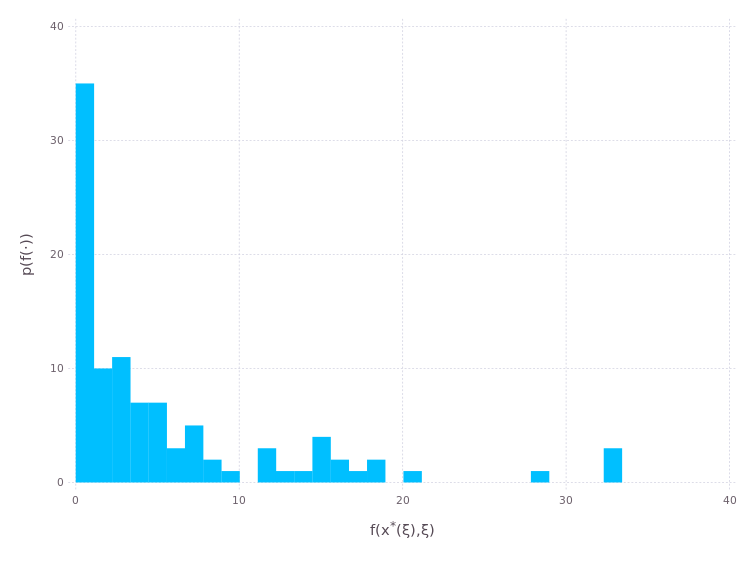

In [8]:
# Plotting cost distribution
p = plot(x = solcost2, Geom.histogram(bincount = 30),Guide.XLabel("f(x<sup>*</sup>(ξ),ξ)"), Guide.YLabel("p(f(⋅))"))

# plt[:hist](solcost2,bins = 30)
# grid("on")
# xlabel(L"f(x^*(\xi),\xi)")
# ylabel(L"p(f(\cdot))")

In [9]:
solcost

100-element Array{Float64,1}:
  1.98206  
  2.91203  
  0.430827 
  0.0484294
  1.49542  
  0.415139 
  0.0322332
  0.0283565
  0.95801  
 10.2291   
  1.76404  
  2.17848  
  0.713359 
  ⋮        
  0.159064 
  8.91362  
  0.870091 
 11.5833   
  0.277311 
 21.8764   
  0.0130099
  7.42689  
  6.19464  
  5.7317   
  0.317498 
  2.71941  